<h1>Questions to be handed in on extrema:</h1>

<p>To get started, we load the <code>Gadfly</code> backend to the <code>Plots</code>package,  so that we can make plots, and load the <code>Roots</code> package for <code>D</code> and <code>fzero</code>:</p>

In [ ]:
using Plots
gadfly()
using Roots			# for D and fzero

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/extrema.html">Maximization and minimization with julia</a>.</p>

<p>For the impatient, <em>extrema</em> is nothing more than a fancy word for describing either a maximum <em>or</em> a minimum. In calculus, we have two concepts of these: <em>relative</em> extrema and <em>absolute</em> extrema. Let's focus for a second on <em>absolute</em> extrema which are stated as:</p>

<blockquote>
<p>A value &#36;y&#61;f&#40;x&#41;&#36; is an absolute maximum over an interval &#36;&#91;a,b&#93;&#36; if &#36;y \geq f&#40;x&#41;&#36; for all &#36;x&#36; in &#36;&#91;a,b&#93;&#36;. (An absolute minimum has &#36;y \leq f&#40;x&#41;&#36; instead.)</p>
</blockquote>

<p>Of special note is that an absolute extrema involves <em>both</em> a function and an interval.</p>

<p>There are two theorems which help identify extrema here. The first, due to Bolzano, says that any continuous function on a <em>closed</em> interval will have an absolute maximum and minimum on that interval. The second, due to Fermat, tells us where to look: these absolute maximums and minimums can only occur at end points or critical points.</p>

<p>Bolzano and Fermat are historic figures. For us, we can plot a function to visually see extrema. The value of Bolzano is the knowledge that yes, plotting isn't a waste of time, as we are <em>guaranteed</em> to see what we look for. The value of Fermat is that if we want to get <em>precise</em> numeric answers, we have a means: identify the end points and the critical points then compare  the function at <em>just</em> these values.</p>

<p>The notes walk us through the task of finding among all rectangles with perimeter 20 the one with maximum area. This is done quickly via:</p>

In [ ]:
A(b, h) = h * b		        # base times height is area
## From P = 2b + 2h -> h = (P -2b)/2
h(b) = (20 - 2b)/2		# Relates perimeter, height, base
A(b) = A(b, h(b))		# substitution step: express Area in terms of b alone
x = fzero(D(A), [0, 10])	# critical point of A(b) on its domain
A(0), A(x), A(10)

(0.0,25.0,0.0)

<p>Here <code>x</code> is a critical point. Following Fermat, we  checked the value of the function at <code>x</code> along with the endpoints, &#36;0&#36; and &#36;10&#36;. However, a simple graph also illustrates that any maximum occurs in between these endpoints (with the minimum occurring at both):</p>

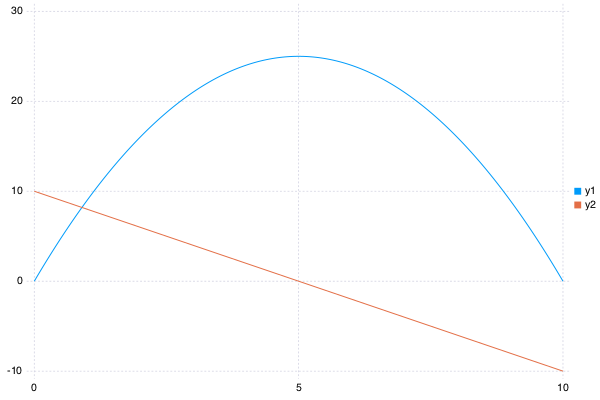

In [ ]:
plot([A, D(A)], 0, 10)		# Notice zero of D(A) corresponds to maximum of A

<p>Notice what is done. The original problem had two variables (a base and a height) and a fixed relationship between them (the perimeter is 20). From this one variable can be deduced in terms of another leaving us a continuous function (<code>A</code>) with extrema of interest (in this case the maximum).</p>

<p>The typical steps are to write out the key relationships: &#36;A&#61;hb&#36; and &#36;P&#61;2b&#43;2h&#36;, then use the constraint on the perimeter to substitute into the equation we are tying to find the extrema of to make it depend on a single variable. Then we can leverage various facts from calculus. The substitution can be algebraically tedious. With <code>julia</code> we leverage <em>multiple dispatch</em> to avoid the algebra: the substitution step of math is done using <strong>composition</strong> of functions. That is we define a funciton <code>A&#40;b&#41;</code> in terms of <code>A&#40;b,h&#41;</code> and let the computer sort out what is meant based on the number of arguments we use when it is called.</p>

<p>To solve for the &#36;x&#36;-value corresponding to the extrema, we used <code>fzero</code> with bracketing, as it is guaranteed to converge and it is clear that the interval &#36;&#91;0,10&#93;&#36; is a bracket for the derivative function. We could also have identified a good initial guess for the maximum from the graph, say 5, and just called <code>fzero</code> with this initial guess, as <code>fzero&#40;D&#40;A&#41;, 5&#41;</code>.</p>

<p>For other problems, we might use <code>fzeros</code> to identify all the critical points. This would return a vector of values, so some additional care is needed. Here we repeat the last two steps to show how the critical points can be checked:</p>

In [ ]:
cps = fzeros(D(A), [0,10])
check_these = [0, cps..., 10]   # one way to add the endpoints to the values to check.
map(A, check_these)

3-element Array{Float64,1}:
  0.0
 25.0
  0.0

<h3>Questions</h3>

<p>For the following questions (which were cribbed from various internet sources), find the most precise answer available, a graphical solution is not enough, the answers should  use one of the zero-finding methods.</p>

<ul>
<li><em>Ye olde post office</em></li>
</ul>

<p>A box with a square base is taller than it is wide. In order to send the box through the U.S. mail, the height of the box and the perimeter of the base can sum to no more than 108 inches. Show how to compute the maximum volume for such a box.</p>

<ul>
<li><em>Inscription</em></li>
</ul>

<p>A trapezoid is inscribed in a semicircle of radius &#36;r&#61;2&#36; so that one side is along the diameter. Find the maximum possible area for the trapezoid.</p>

<p>Draw a picture of a semicircle and a trapezoid. The trapezoid intersects the circle at &#36;&#40;r,0&#41;&#36;, &#36;&#40;-r,0&#41;&#36;, &#36;&#40;r \cos&#40;t&#41;, r\sin&#40;t&#41;&#41;&#36; and &#36;&#40;-r\cos&#40;t&#41;, r\sin&#40;t&#41;&#41;&#36; where &#36;t&#36; is some angle in &#36;&#91;0, \pi/2&#93;&#36;. The area of trapezoid is the height times the average of the two bases.</p>

<ul>
<li><em>Cheap paper cups</em></li>
</ul>

<p>A cone-shaped paper drinking cup is to hold 100 cubic centimeters of water (about 4 ozs). Find the height and radius of the cup that will require the least amount of paper.  The volume of such a cup is given by the volume of a cone formula: &#36;V &#61; &#40;1/3&#41;\pi r^2 h&#36;; and the area of the paper is given by for formula for surface area of a cone: &#36;A&#61;\pi r \sqrt&#123;r^2 &#43; h^2&#125;&#36;. Show any work.</p>

<ul>
<li><em>How big is that can?</em></li>
</ul>

<p>A cylindrical can, <strong>open on top</strong>, is to hold 355 cubic centimeters of liquid. Find the height and radius that minimizes the amount of material needed to manufacture the can. (These are metric units, so the answer will be in centimeters with 2.54cm=1in.)  Illustrate how this is done:</p>

<p>Do these proportions match those that are typical for a 12 oz can?</p>

<ul>
<li><em>Getting closer</em></li>
</ul>

<p>Let &#36;f&#40;x&#41; &#61; \tan&#40;x&#41;&#36;. Find the point on the graph of &#36;f&#40;x&#41;&#36; that is closest to the point &#36;&#40;\pi/4, 0&#41;&#36;. Show any work.</p>

<ul>
<li><em>Best size for a phone</em></li>
</ul>

<p>A cell phone manufacturer wishes to make a rectangular phone with total surface area of 12,000 &#36;mm^2&#36; and maximal screen area. The screen is surrounded by bezels with sizes of 8&#36;mm&#36; on the long sides and 32&#36;mm&#36; on the short sides. (So the width of the screen would be the width of the phone minus 2 time 8mm, and the height of the screen similarly adjusted.)</p>

<p>What are the dimensions (width and height) that allow the maximum screen area? </p>

<p>The dimensions for the most phones have a height that is about twice the   width. Is that the case for your answer?</p>

<ul>
<li><em>Will you be in the water?</em></li>
</ul>

<p>The Statue of Liberty stands 92 meters high, including the pedestal which is 46 meters high. How far from the base is it when the viewing angle, theta, is as large as possible? <a href="http://astro.temple.edu/~dhill001/maxmin/viewanglepic.gif">figure</a></p>